## Diamond Analysis

The following notebook was created to analyse 3 questions regarding the Diamond busines.

1. Is it possible to visualise relationships between Diamond qualities and thier price?
2. Oftentimes people without knowledge assume the larger a diamond (carat) the more valuable it is, this is not always true and can it be demonstrated easily?
3. Can a predictive model of price be created with a good level of accuracy that utilises both numerical and categorical qualities of Diamonds?

The underlying data was obtained from Kaggle in order to proove the potentiall of such a model; however, its likely the prices stated do not reflect the market conditions of 2020.


In [40]:
# Fix up the imports and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
# It looks like the data contains an unamed column which only appears to be an identifier of the row. Lets remove this
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
# Lets have a look at the descriptive statistics of the numerical data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


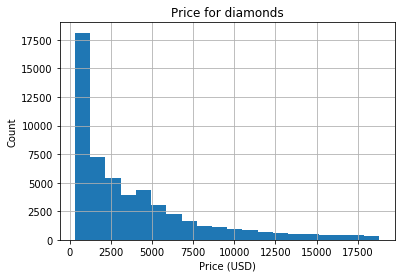

In [45]:
# Lets look at the distribution of prices assuming that higher valued diamonds are more rare
df['price'].hist(bins=20);
plt.title('Price for diamonds');
plt.xlabel('Price (USD)');
plt.ylabel('Count');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13555e8d0>,
      dtype=object)

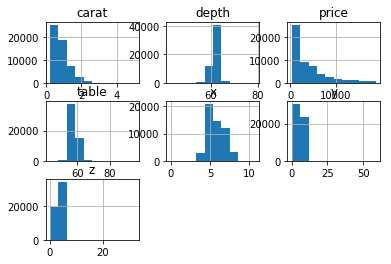

In [46]:
# Hist() allows us to perform a quick matrix plot of the different numerical variables to see if we can spot anything 
# immediately interesting

df.hist()

In [47]:
# Carat and price seem to follow the same pattern so clearly weight influences price strongly

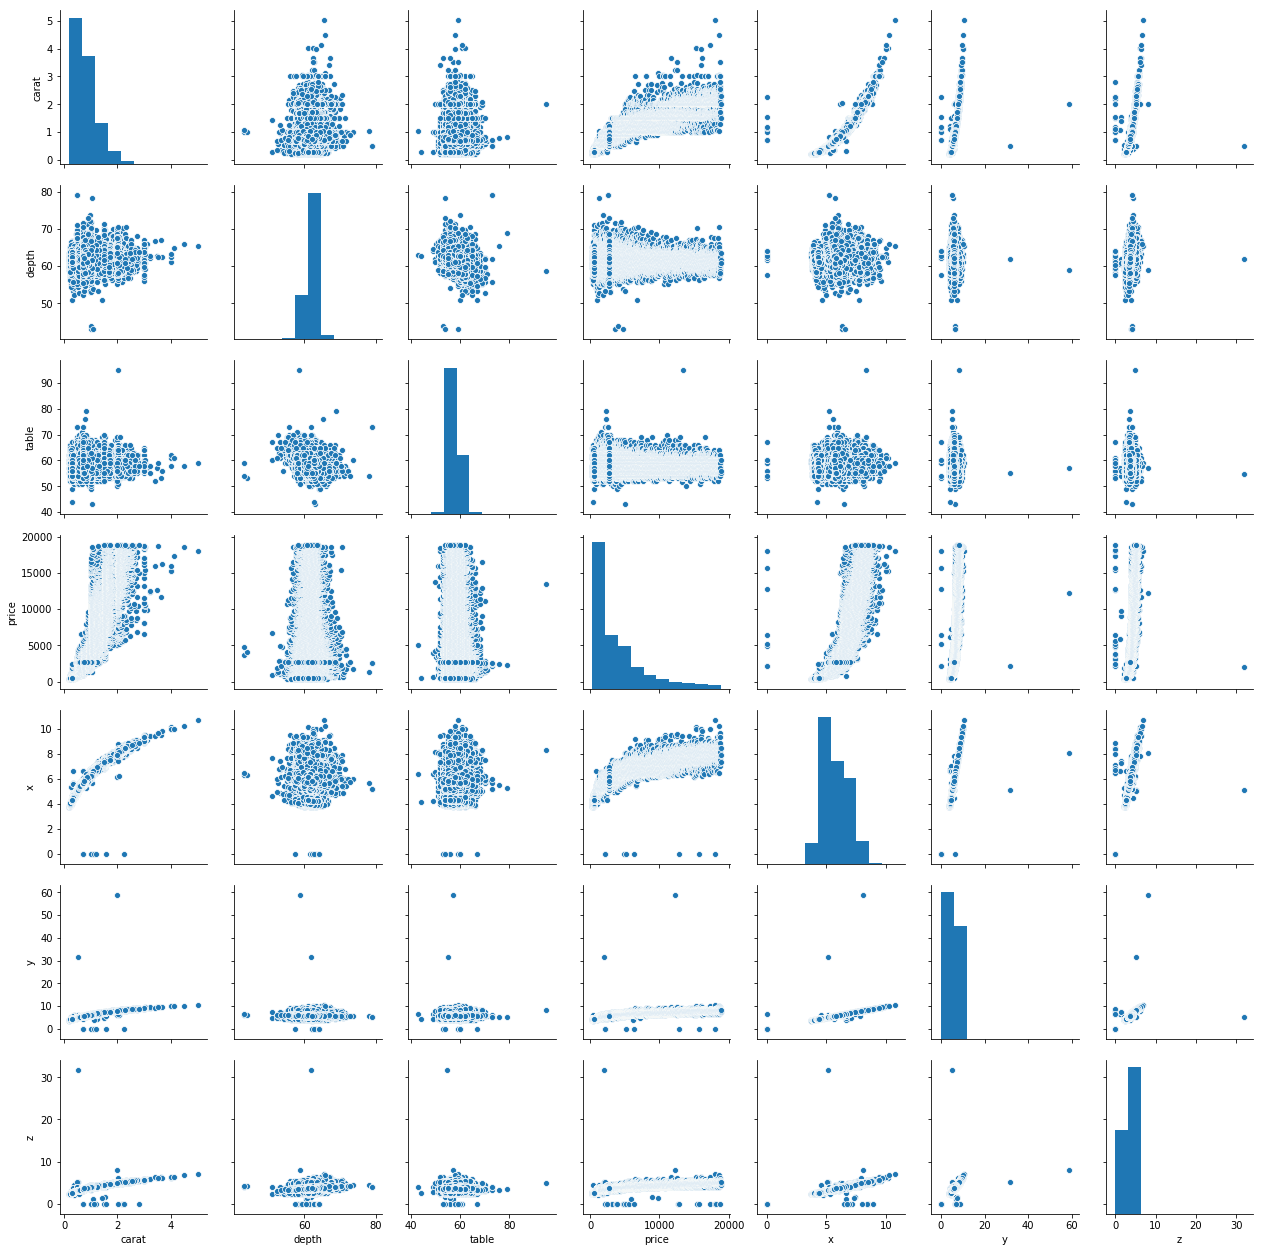

In [48]:
# we could also try a seaborne pairplot
sns.pairplot(df);

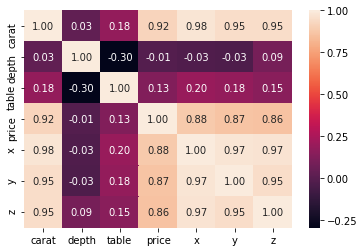

In [49]:
# Lets look at the pairwise correlation of the columns
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [50]:
# Price is strongly correlated to carat, in turn it seems carat is stronly correlated to x, y ,z dimensions
# which is what we should expect

In [51]:
# What about categorical values - how do they influence price

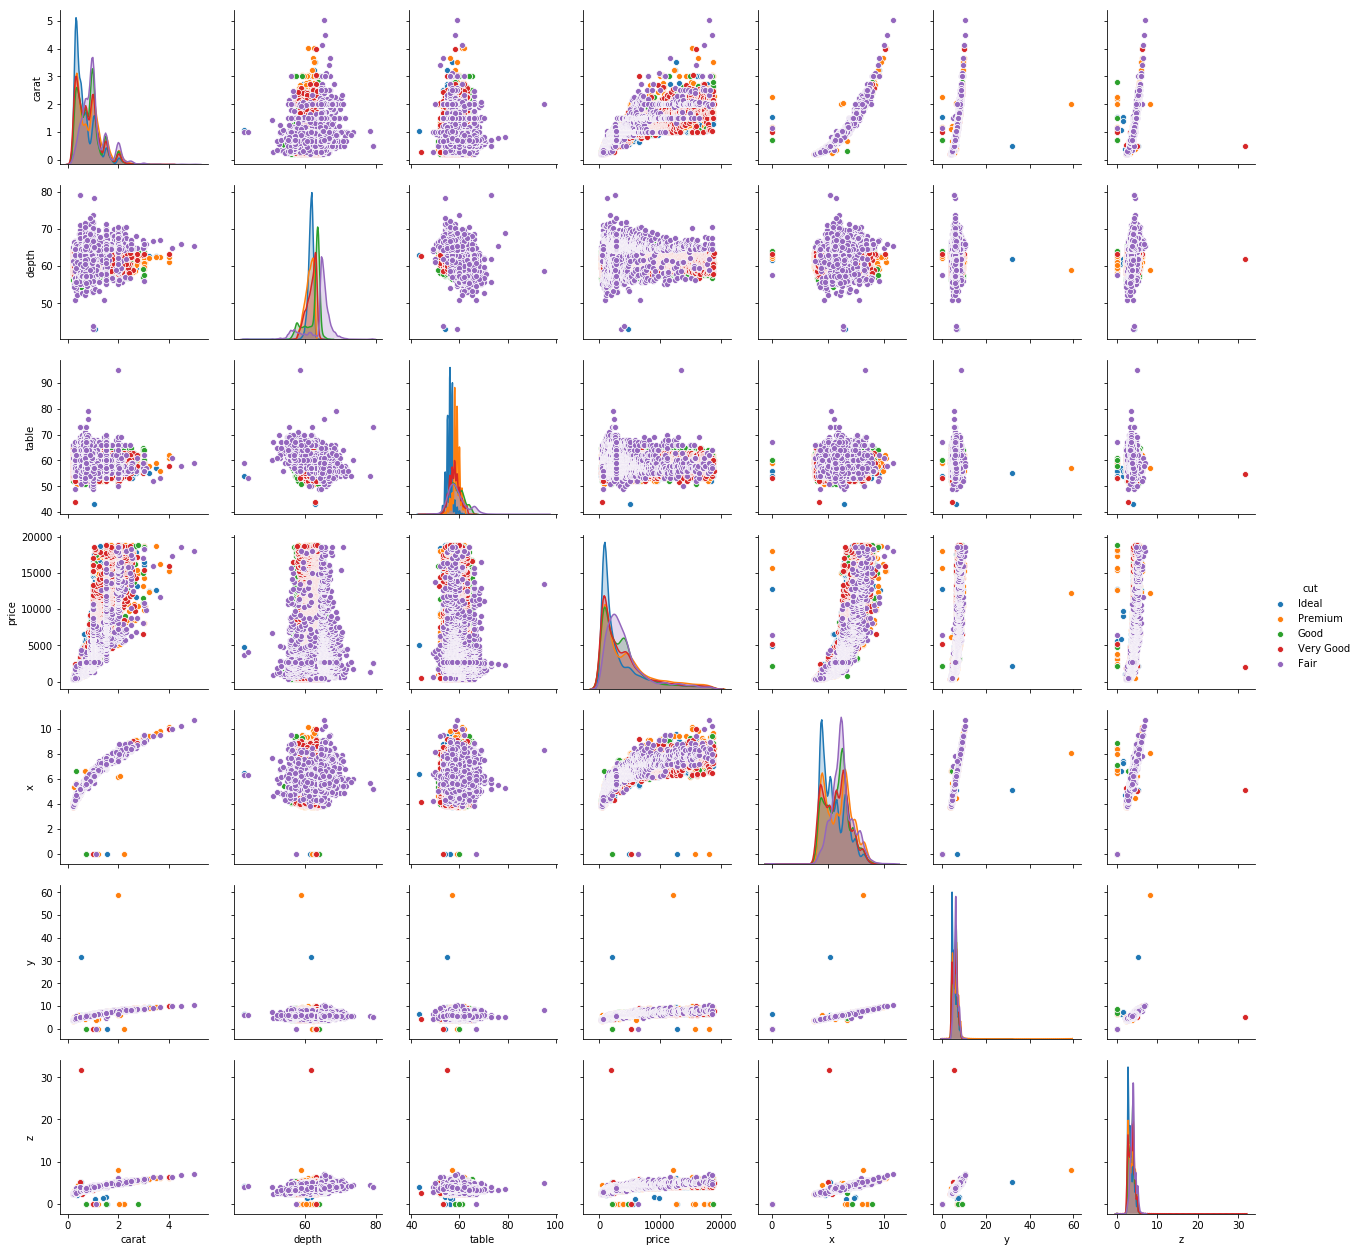

In [52]:
sns.pairplot(df, hue='cut');

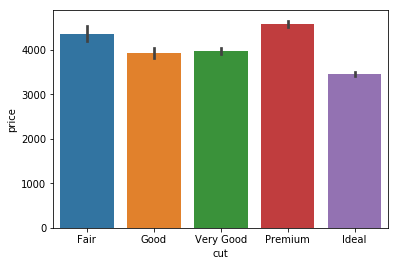

In [53]:
# Lets take a closer look at cut and price
sns.barplot(x="cut", y="price", data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

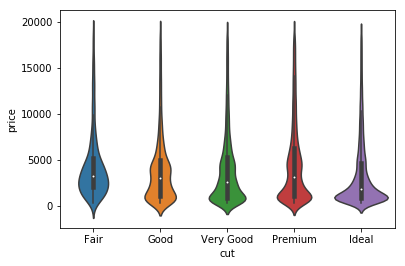

In [54]:
sns.violinplot(x="cut", y="price", data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

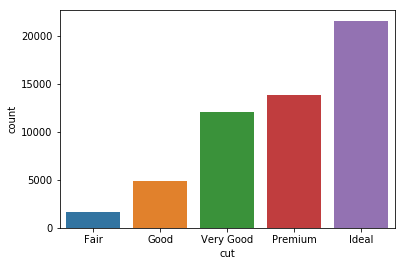

In [55]:
sns.countplot(x="cut", data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

In [ ]:
# Lets do the same with color

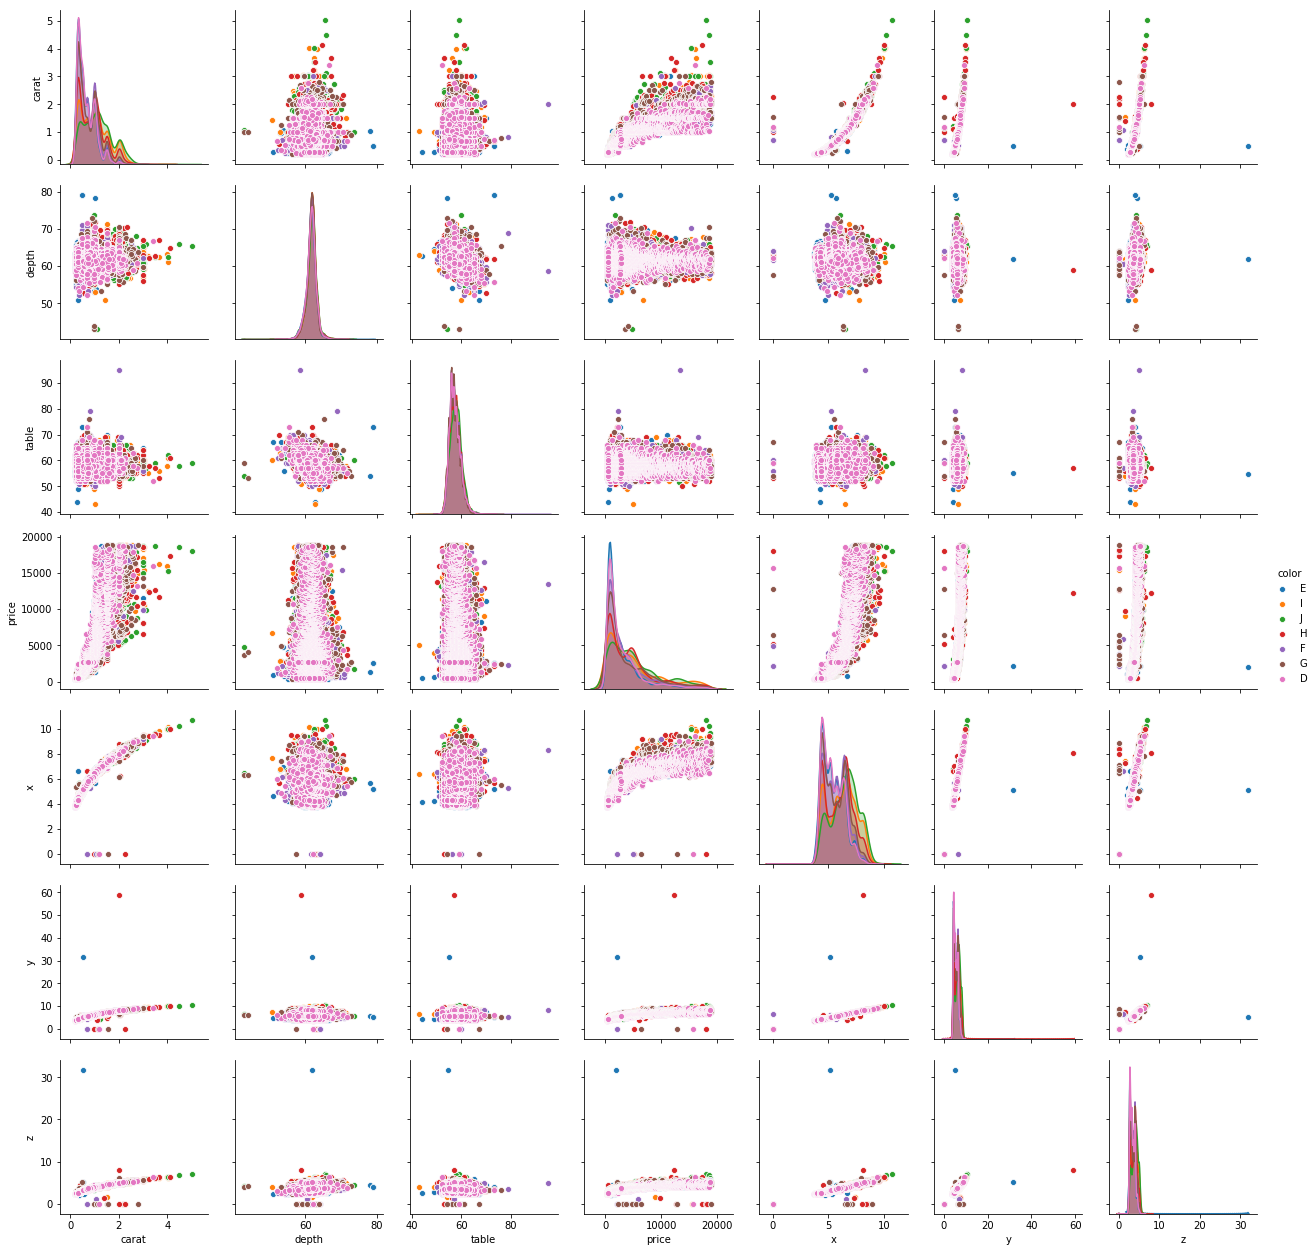

In [56]:
sns.pairplot(df, hue='color');

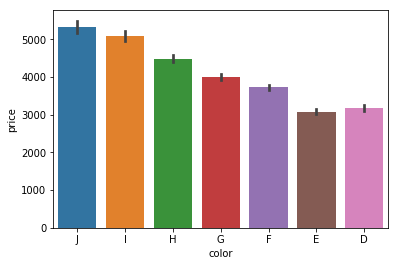

In [57]:
sns.barplot(x="color", y="price", data=df, order=['J','I','H','G','F','E','D'])

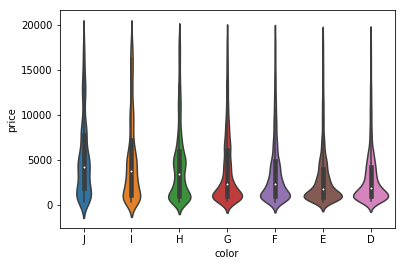

In [58]:
sns.violinplot(x="color", y="price", data=df, order=['J','I','H','G','F','E','D'])

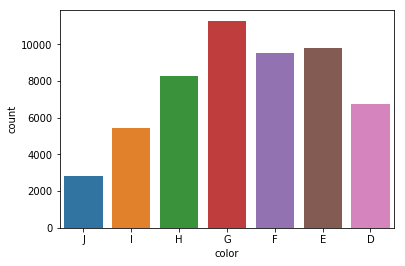

In [59]:
sns.countplot(x="color", data=df, order=['J','I','H','G','F','E','D'])

In [60]:
# Lets do the same with clarity

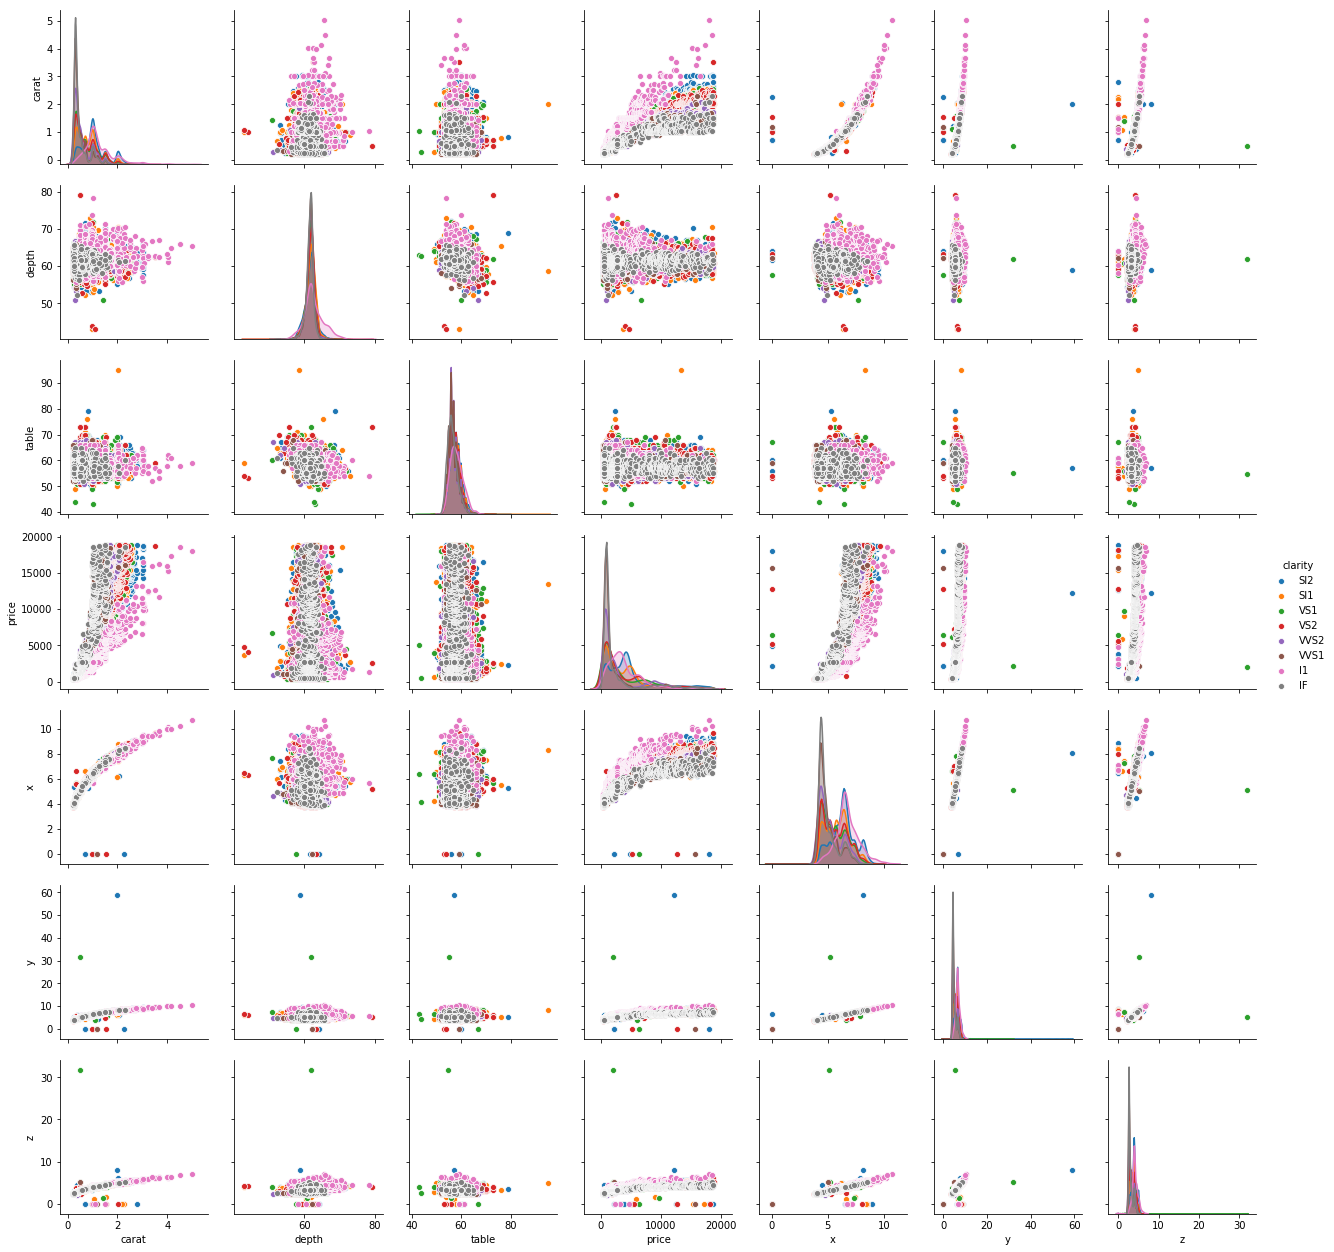

In [61]:
sns.pairplot(df, hue='clarity');

In [22]:
# We can clearly see that Internally Flawless on the price carat graph can be smaller yet demand a higher price whereas
# those with inclusions have to be larger to attain higher prices

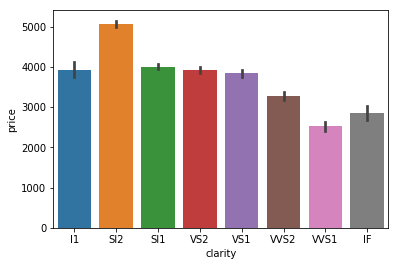

In [62]:
sns.barplot(x="clarity", y="price", data=df, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

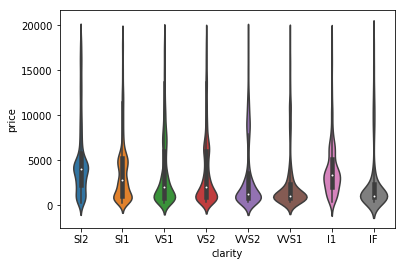

In [63]:
sns.violinplot(x="clarity", y="price", data=df)

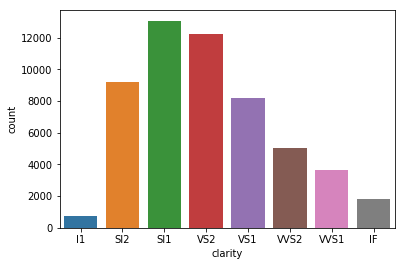

In [64]:
sns.countplot(x="clarity", data=df, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

In [ ]:
# Can we visualise some of the categorical qualities in relation to carat easily demonstrating that size (carat)
# is not the only determinant of price.

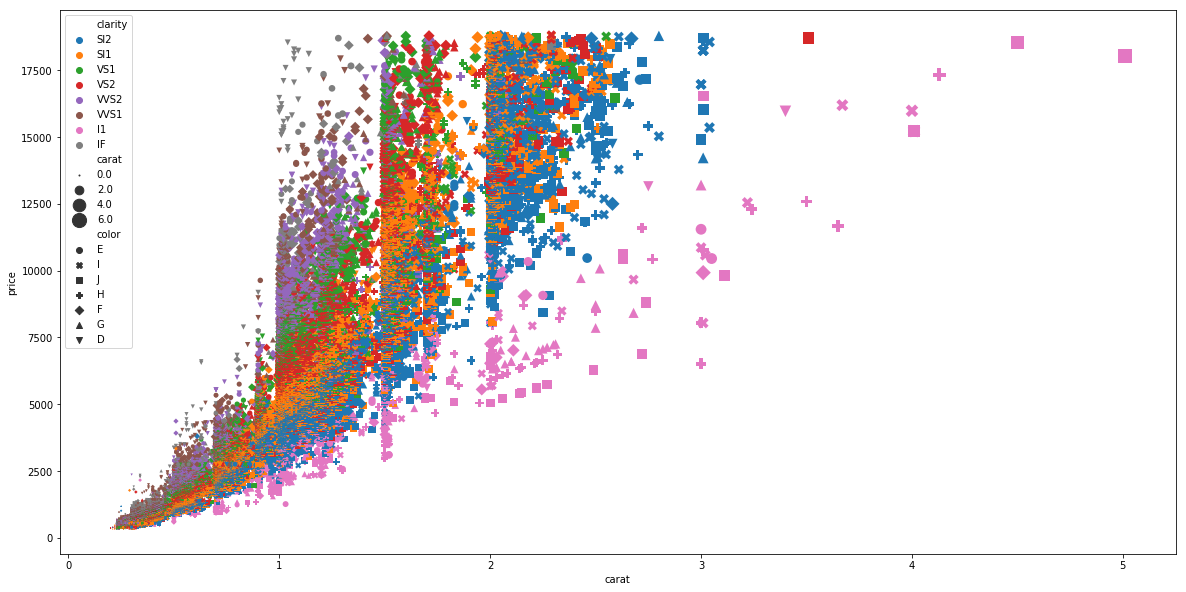

In [26]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="carat",alpha=1.0, y="price",
                     hue="clarity", size="carat",style="color",
                      sizes=(1, 200),linewidth=0,
                     ax=ax, data=df)

In [65]:
# Price has a high correlation to carat though higher quality IF and Whiter Diamonds of 1 carat can match the 
# prices of 3-5 carat diamonds. There appear to be fewer IF diamonds and they seem to have a lower carat,
# perhaps suggesting the probability of inclusions in a larger diamond is higher. There also appears to be strata
# of 1 1.5 2 and 3 carats, suggesting that the diamonds are cut to standard weights - though it seems smaller
# and larger diamonds are left closer to thier natural size perhaps.

In [84]:
# Can we visualise the strata found in Carat

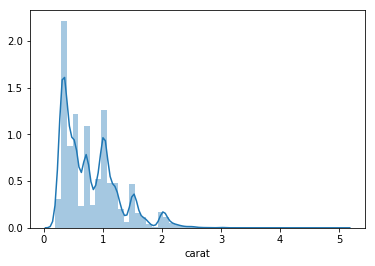

In [102]:
sns.distplot(df['carat'], rug=False)

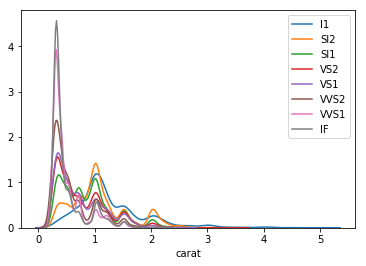

In [110]:
clarities = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Iterate through the clarities
for clarity in clarities:
    # Subset to the clarity
    subset = df[df['clarity'] == clarity]
    
    # Draw the density plot
    sns.distplot(subset['carat'], hist = False, kde = True, label = clarity)
    


In [90]:
# Can we use the numericals to build a price prediction model

In [67]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['price', 'carat', 'depth', 'table', 'x','y','z']]

# Mean function
#fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
#fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = num_vars[['carat', 'depth', 'table', 'x','y','z']]
y = num_vars['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.859640551635 on 16182 values.'

In [69]:
# Lets see if we can improve the model be including the categoricals, these will have to be encoded via
# get_dummies

In [70]:
df.dtypes
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [71]:
pd.get_dummies(df['cut']).head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [72]:
pd.get_dummies(df['color']).head()

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [73]:
pd.get_dummies(df['clarity']).head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0


In [74]:
cat_df = df.select_dtypes(include=['object']).copy()

In [75]:
cat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [76]:

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [79]:

cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False)



In [80]:
df_new.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [81]:
# Lets build the model with the categoricals and see if accuracy improves

In [109]:
#Split into explanatory and response variables
X = df_new.drop('price', axis=1)
y = df_new['price']


#Split into training and tests data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=30) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.918952496774 on 16182 values.'

## Notes:

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

Colour grading actually rates colourlessness in a white diamond. Diamonds at the higher end of the scale are closest to being totally colourless, while diamonds with lower colour grading have a slightly tinted hue. To the naked eye, white diamonds closest to each other on the classification scale can seem identical but these slight, imperceptible differences in hue can have a huge impact on value and price.

D to F-graded white diamonds are icy in appearance and the rarest and highest quality in terms of colour

G to H-graded white diamonds are near-colourless and recommended for stones over one carat

I to J-graded white diamonds offer great value for stones under one carat because their colour is virtually unnoticeable unless you whip out a professional lens

FL means a stone is Flawless inside and out, and IF means that it is Internally Flawless but may have superficial and oh-so microscopic scratches on the surface. These are the rarest and highest valued diamonds, commanding a serious price tag.

VVS1 or VVS2 stones are very, very slightly included, but these are pretty much undetectable even when looked at under 10x magnification.

VS1 or VS2 stones are very slightly included with minute characteristics that are barely visible to the naked eye.

SI1 grade stones – the most commercially sought – are slightly included but it’s still barely noticeable to the naked eye. These are true budget optimisers and with just the right choice of cut, can offer big results when it comes to brilliance and fire, aka the bright clear light and coloured glimmers that a diamond emits when it glints. Our diamond selection stops here on the clarity scale.
We don’t use any diamonds graded lower than SI1 this but here’s how the grading is classified for diamonds on the rest of the scale.

SI2 grade stones have inclusions that are visible under a 10x loupe magnifier and can sometimes be seen by the naked eye.

I1, I2 or I3 or included diamonds have the most internal and external inclusions or blemishes which can affect brilliance and transparency. These are the easiest diamonds to come by and are the least expensive.

The sparkle of a diamond is graded from Super Ideal to Fair:

Super Ideal is truly the apex of perfect symmetry displaying superior fire, brilliance and scintillation

Ideal is perfectly proportioned to refract maximum light giving off incredible brilliance, fire and sparkle 

Very Good, sometimes known as excellent, emits very nearly the same light and brilliance as the Ideal cut but is much less costly

Good reflects and refracts almost all the light that enters the diamond but a fraction less than the Very Good grade 

Fair means that most of the light and brilliance is refracted through the top but quite not as brightly as some cuts, and some is leaked out from the sides and bottom of the stone

Given that cut has the most impact on the quality, symmetry and overall beauty of a diamond, we say it’s the most important of the 4 Cs to consider when choosing a stone. You could for instance opt for an Ideal instead of Super Ideal grading if you choose a shape that’s better-matched to conceal any natural inclusions, such as the round brilliant. Which, FYI, is incredibly sparkly and the most popular choice for an engagement ring.
Related 4 Cs